### Importing the libraries.

In [24]:
#Load the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify
import plotly.express as px
import plotly.graph_objects as go

### Importing the Essential datasets

In [31]:
country_level_dataset = pd.read_csv('./Country_level_dataset.csv')
city_level_dataset = pd.read_csv('./city_level_data_0_0.csv')


#filtering the required data
country = country_level_dataset[['country_name', 'gdp','composition_food_organic_waste_percent',
                                 'population_population_number_of_people']]

city = city_level_dataset[['country_name', 'city_name','composition_food_organic_waste_percent']]



# changine column names
country = country.rename(columns = {"country_name":"country","gdp":"GDP","composition_food_organic_waste_percent":"organic_food_waste_percent","population_population_number_of_people":"population"})
city = city.rename(columns = {"country_name":"country","city_name":"city","composition_food_organic_waste_percent":"organic_food_waste_percent" })    

# show dataset
country = country.dropna()
city = city.dropna()
# country_level_dataset.head()

## GDP vs Organic Waste Percent

Ths scatter plot graph between the GDP and the Organic food waste percent. It is showing the standing of different countries with respect to one another. You can see that the countries are evenly distributes over the plot.

In [32]:
# GDP VS Waste

fig2 = go.Figure(data=go.Scatter(x=country['GDP'],
                                y=country['organic_food_waste_percent'],
                                mode='markers',
                                marker_color=country['population'],
                                text=country['country'])) 

fig2.update_layout(title='GDP vs the Organic food waste percent of different countries',
                   xaxis_title="GDP", yaxis_title = "Organic Food waste Percent")

# fig1.show()
fig2.show()


### Population vs GDP

The below plot is a scatter plot between the population and GDP. A vatirtey of countries has GDP between 0 to 20k while they are diverse variety of population.


In [4]:
# population vs gdp
fig2 = go.Figure(data=go.Scatter(x=country['GDP'],
                                y=country['population'],
                                mode='markers',
                                marker_color=country['population'],
                                text=country['country'])) 

fig2.update_layout(title='GDP vs Population of different countries',
                   xaxis_title="GDP", yaxis_title = "Population")
fig2.update_yaxes(type="log")

# fig1.show()
fig2.show()



### Population vs organic food waste percent

The below scatterplot is between population and organic food waste percent. There is no specific relationship between both but there the countries are diversly scattered.

In [5]:
# population vs food waste 

fig2 = go.Figure(data=go.Scatter(x=country['organic_food_waste_percent'],
                                y=country['population'],
                                mode='markers',
                                marker_color=country['population'],
                                text=country['country'])) 

fig2.update_layout(title='Population vs food waste percent of different countries',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "Population")
fig2.update_yaxes(type="log")

# fig1.show()
fig2.show()

### Trend between GDP and organic food waste percent

The below is the regression line between GDP and Organic food waste percent. This graph shows the trend between GDP and Organic food waste percent. You can clearly see the relationship between both of them. Both of them has a linear relationship.  

In [43]:
# showing the corelation between gdp and food waste percent by regression line

fig1 = px.scatter(country,x=country.organic_food_waste_percent,y=country.GDP, trendline = "ols")
fig1.update_layout(title='Regression line on the GDP vs Organic Food waste percent',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "GDP")
fig1.show()

### Trend between population and organic food waste percent

The below graph shows the trend between the population and Organic food waste percent. You can see a logistic regression trend between the organic food waste percent and population. 

In [63]:
# showing the corelation between population and food waste percent by regression line

fig1 = px.scatter(country,x=country.organic_food_waste_percent,y=country.population, trendline = "ols", log_y = True)
fig1.update_layout(title='Regression line on Population vs Organic food waste percent',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "Population")
fig1.show()

### List of top ten countries with leading organing waste percent and countries with the minimilist organic food waste percent

The below are the list of top ten and the bottom ten countries countries in the list with the highest and the lowest organic food waste percent 

In [35]:
least_ten_countries = country.sort_values(by=['organic_food_waste_percent'],ascending=True).head(10)
top_ten_countries = country.sort_values(by=['organic_food_waste_percent'],ascending=False).head(10)

In [40]:
print("List of countries with the lowest organic food waste percent")
least_ten_countries

List of countries with the lowest organic food waste percent


,country,GDP,organic_food_waste_percent,population
118,"Macao SAR, China",117335.585938,3.10,612167
135,Mauritania,4783.635742,4.80,3506288
173,San Marino,58806.199219,5.35,33203
207,British Virgin Islands,24215.882812,6.50,20645
126,Marshall Islands,3628.895264,8.00,52793
30,Botswana,14126.389648,8.10,2014866
93,Iceland,55274.187500,10.00,343400
169,Singapore,97341.468750,10.51,5703600
47,Cayman Islands,66207.445312,10.90,59172
168,Senegal,3067.662598,12.00,15411614


In [41]:
print("List of countries with the lowest organic food waste percent")
least_ten_countries

List of countries with the lowest organic food waste percent


,country,GDP,organic_food_waste_percent,population
118,"Macao SAR, China",117335.585938,3.10,612167
135,Mauritania,4783.635742,4.80,3506288
173,San Marino,58806.199219,5.35,33203
207,British Virgin Islands,24215.882812,6.50,20645
126,Marshall Islands,3628.895264,8.00,52793
30,Botswana,14126.389648,8.10,2014866
93,Iceland,55274.187500,10.00,343400
169,Singapore,97341.468750,10.51,5703600
47,Cayman Islands,66207.445312,10.90,59172
168,Senegal,3067.662598,12.00,15411614


### Line Graph for the top ten countries in organic food waste percent.

The above graph shows the line graph of the top ten and the bottom ten countries with the highest and the lowest organic food waste percent. 

In [64]:
# line graph of GDP vs waste percent of top ten countries with highest and lowest organic food waste percent

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=top_ten_countries['organic_food_waste_percent'], y=top_ten_countries['GDP'],
                    mode='lines+markers',
                    name='Least Ten Countires'))
fig.update_layout(title='GDP vs Food waste percent',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "GPD")
fig.show()




### Line Graph for the bottom ten countries in organic food waste percent.

In [65]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=least_ten_countries['organic_food_waste_percent'], y=least_ten_countries['GDP'],
                    mode='lines+markers',
                    name='Top Ten Countries'))
fig1.update_layout(title='GDP vs Food waste percent',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "GPD")

### Box plot of GDP 

The below are the boxplot for the GDP, population and Organic food waste percent. The box plot shows the information regarding like mean, median and many more.

In [56]:
fig = px.box(country, y =['GDP'] , points="all")
fig.update_layout(title='Box plot GDP}', xaxis_title = "GDP")
fig.show()

### Box plot for Population

In [62]:
fig = px.box(country, y =['population'] , points="all",log_y=True)
fig.update_layout(title='Box plot Pouplation}', xaxis_title = "Population", yaxis_title = "In billions")
fig.show()

### Box plot for organic food waste percent

In [61]:
fig = px.box(country, y =['organic_food_waste_percent'] , points="all")
fig.update_layout(title='Box plot Organic food waste percent}', xaxis_title = "Organic food waste percent", yaxis_title = "Percent")
fig.show()

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Exclude Antarctica
world = world.loc[world.continent != 'Antarctica']

# fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

# world.plot(ax=ax1, scheme="quantiles", k = 10, column = 'pop_est', linewidth = 1, edgecolor = 'black',
#            legend = True, legend_kwds={'loc': 'lower left'}) 

world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [17]:
gdf_water = world.merge(country_level_dataset, left_on = 'iso_a3', right_on = 'iso3c', how='left')

In [59]:
# gdf_water.columns

### Representing Geoplot for Organic food waste percent

The below geoplot represents the organic food waste percent over the world. You can see thatmany african and south american countries has the middle to high organic food waste percent.

<AxesSubplot:>

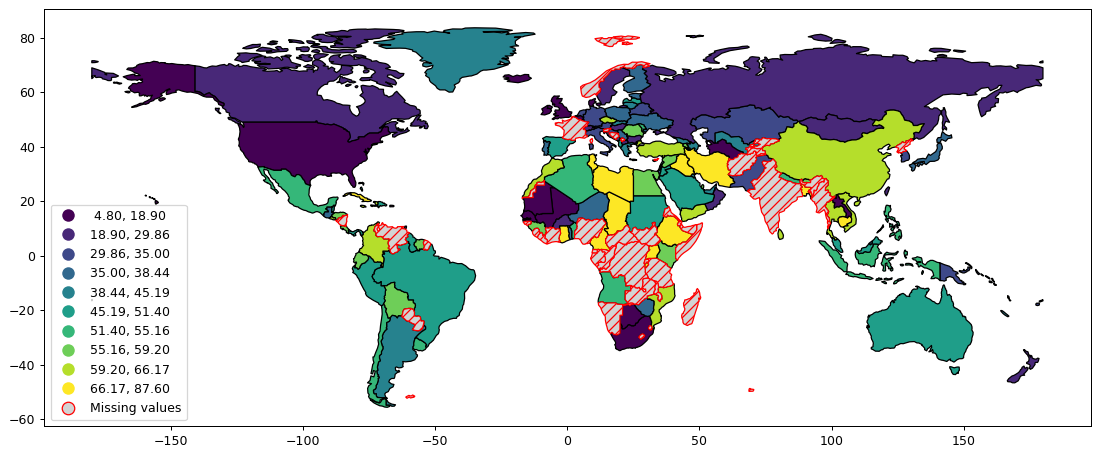

In [19]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

gdf_water.plot(ax=ax1, scheme="quantiles", k = 10, column = 'composition_food_organic_waste_percent', linewidth = 1, edgecolor = 'black',
               missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"},
           legend = True, legend_kwds={'loc': 'lower left'}) 

### Geoplot of the GDP of different countries

The below geoplot shows the GDP distribution of different countries.

<AxesSubplot:>

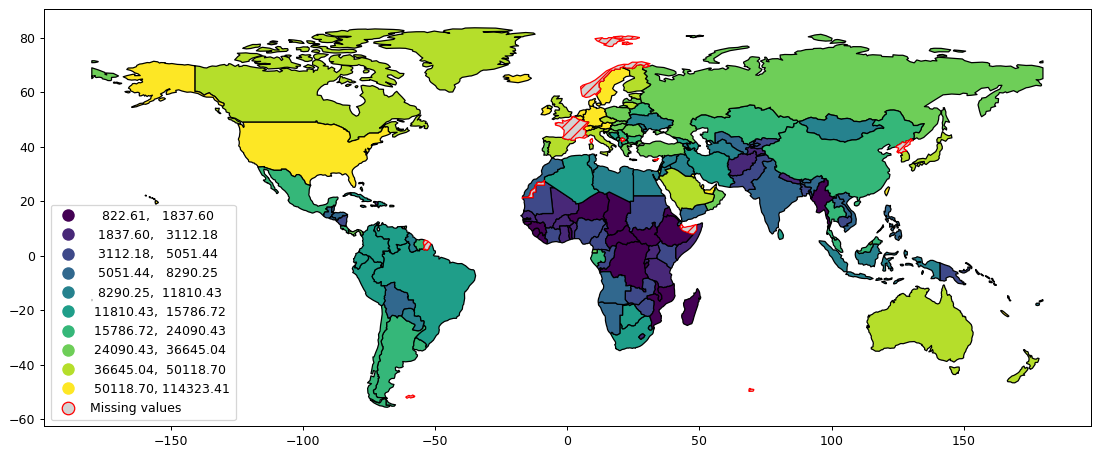

In [67]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

gdf_water.plot(ax=ax1, scheme="quantiles", k = 10, column = 'gdp', linewidth = 1, edgecolor = 'black',
           legend = True, legend_kwds={'loc': 'lower left'},missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"}) 

### GeoPlot for the for Special waste agricultural waste (tons/year)

The below graph show the special waste agricultural waste produced by few of the countries. Mouch of the data is still mssing so the grey part wit the dashed lines shows the missing data.

<AxesSubplot:>

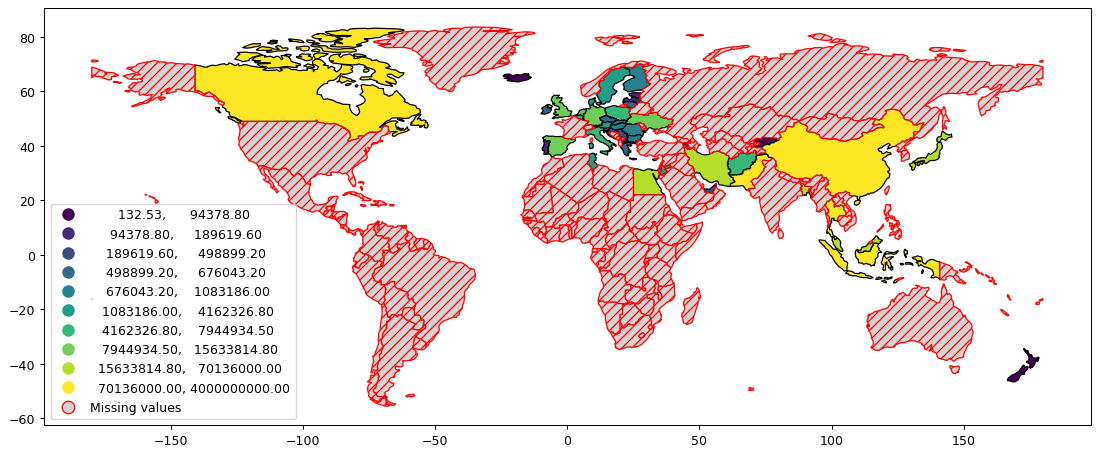

In [21]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

gdf_water.plot(ax=ax1, scheme="quantiles", k = 10, column = 'special_waste_agricultural_waste_tons_year', linewidth = 1, edgecolor = 'black',
           legend = True, legend_kwds={'loc': 'lower left'},missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"}) 